<a href="https://colab.research.google.com/github/Deepakvk18/HeartDisease/blob/master/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install skops --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 8.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from category_encoders import OneHotEncoder
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
import pickle
from ipywidgets import interact, FloatSlider
from sklearn.linear_model import LogisticRegression

Dataset Link https://archive.ics.uci.edu/ml/datasets/heart+Disease

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Aman-Preet-Singh-Gulati/heart-disease-prediction/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# About the Dataset

1. #3 (age) - age in years
2. #4 (sex) - sex (1 = male; 0 = female)
3. #9 (cp) - chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4. #10 (trestbps) - Resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) - serum cholestoral in mg/dl
6. #16 (fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg) - resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach) - maximum heart rate achieved
9. #38 (exang) - exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak) - ST depression induced by exercise relative to rest
11. #41 (slope) -  the slope of the peak exercise ST segment
        -- Value 0: upsloping
        -- Value 1: flat
        -- Value 2: downsloping
12. #44 (ca) - number of major vessels (0-3) colored by flourosopy
13. #51 (thal) - 
        -- Value 0: normal
        -- Value 1: fixed defect
        -- Value 2: reversable defect
        -- Value 3: permanent defect
14. #58 (num) (the predicted attribute) - diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

In [ ]:
def wrangle(df):

  df['cp'] = df['cp'].replace({0:"no pain", 1: "typical angina", 2:"atypical angina", 3:"non-anginal pain", 4:"asymptomatic"})

  df['restecg'] = df['restecg'].replace({0:"normal", 
                                         1:"having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)", 
                                         2:"showing probable or definite left ventricular hypertrophy by Estes' criteria"})
  
  df['slope'] = df['slope'].replace({2:"upsloping", 1:"flat", 0:"downsloping"})

  df['thal'] = df['thal'].replace({0:"normal", 1:"fixed defect", 2:"reversable defect", 3:"permanent defect"})

  return df

In [ ]:
df = wrangle(df)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,non-anginal pain,145,233,1,normal,150,0,2.3,downsloping,0,fixed defect,1
1,37,1,atypical angina,130,250,0,having ST-T wave abnormality (T wave inversion...,187,0,3.5,downsloping,0,reversable defect,1
2,41,0,typical angina,130,204,0,normal,172,0,1.4,upsloping,0,reversable defect,1
3,56,1,typical angina,120,236,0,having ST-T wave abnormality (T wave inversion...,178,0,0.8,upsloping,0,reversable defect,1
4,57,0,no pain,120,354,0,having ST-T wave abnormality (T wave inversion...,163,1,0.6,upsloping,0,reversable defect,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 33.3+ KB


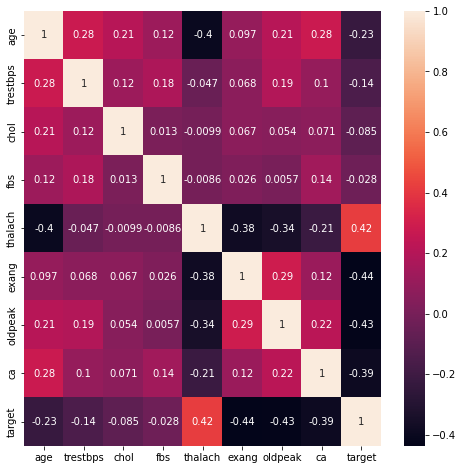

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True);

In [ ]:
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes('number').columns
# len(cat_cols) + len(num_cols) == len(df.columns)
len(cat_cols), len(num_cols), len(df.columns)

(5, 9, 14)

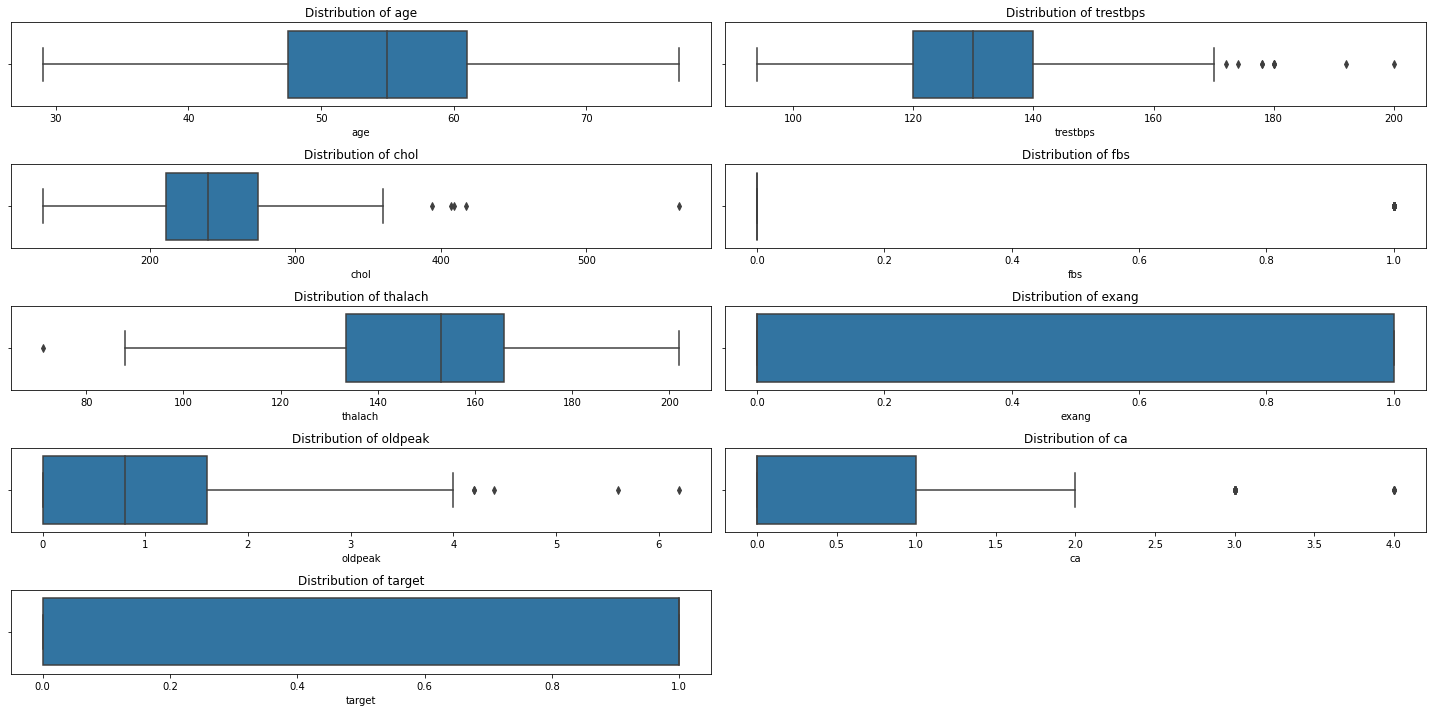

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(1, 10):
  plt.subplot(5, 2, i)
  sns.boxplot(data=df, x=num_cols[i - 1])
  plt.xlabel(num_cols[i - 1])
  plt.title(f"Distribution of {num_cols[i - 1]}")

plt.tight_layout()

I studeid all the variables in the boxplot and the findings are as follows:
1. There is no anomalies in the age. Since the range of age is between 30 and 75, age need not be changed.
2. I also studied about the normal resting heart rate which can be anywhere between 80 and 200. Here too, everything is under control.
3. A cholestrol of 500+ is also possible under some extreme cases.
4. fbs is a categorical variable
5. Maximum heart rate achieved has one outlier which is below 80.
6. exang is a categorical variable.
7. Unable to find baseline values for old peak
8. ca is a categorical variable.
9. thal is a categorical variable.
10. target is a categorical variable.

## Baseline

In [ ]:
max_val = df['target'].value_counts(normalize=True).max()
print("Baseline Accuracy is:", round(max_val * 100, 2), "%")      # Baseline Accuracy

Baseline Accuracy is: 54.46 %


# Train Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], random_state=42, test_size=0.15)

In [ ]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    MinMaxScaler(),
    LogisticRegression(n_jobs=-1, class_weight='balanced')
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['cp', 'restecg', 'slope', 'thal'],
                               use_cat_names=True)),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', n_jobs=-1))])

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.95      0.75      0.84        28

    accuracy                           0.83        46
   macro avg       0.83      0.85      0.82        46
weighted avg       0.86      0.83      0.83        46



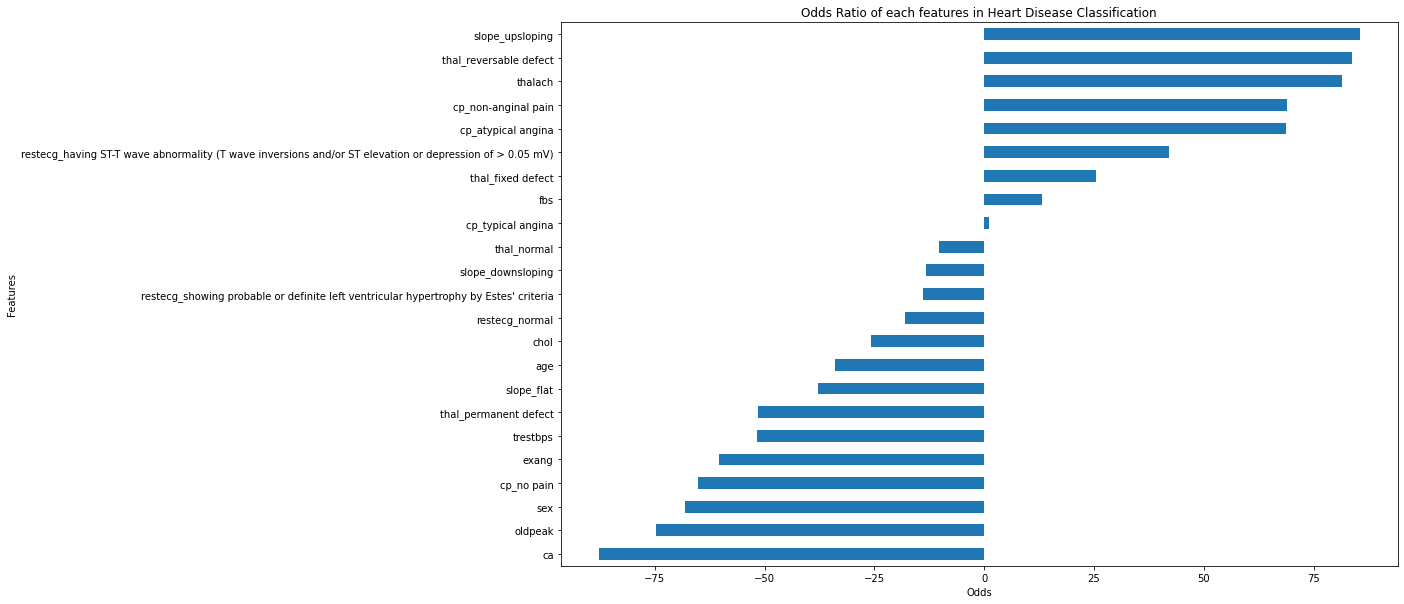

In [ ]:
odds = (np.exp(model.named_steps['logisticregression'].coef_).flatten() - 1.0) * 100
feats = model.named_steps['onehotencoder'].get_feature_names_out()
importances = pd.Series(odds, index=feats).sort_values()
plt.figure(figsize=(15, 10))
importances.plot(kind='barh')
plt.xlabel('Odds')
plt.ylabel('Features')
plt.title('Odds Ratio of each features in Heart Disease Classification');

# Model Inference

In [ ]:
sample = np.array(X_train.sample())
sample

array([[49, 1, 'atypical angina', 120, 188, 0,
        'having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)',
        139, 0, 2.0, 'flat', 3, 'permanent defect']], dtype=object)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
sam = pd.DataFrame(
    {
        'age': sample[0][0],
        'sex': sample[0][1],
        'cp': sample[0][2],
        'trestbps': sample[0][3],
        'chol': sample[0][4],
        'fbs': sample[0][5],
        'restecg': sample[0][6],
        'thalach': sample[0][7],
        'exang': sample[0][8],
        'oldpeak': sample[0][9],
        'slope': sample[0][10],
        'ca': sample[0][11],
        'thal': sample[0][12],
     
    },
    index=[0]
)
sam

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,49,1,atypical angina,120,188,0,having ST-T wave abnormality (T wave inversion...,139,0,2.0,flat,3,permanent defect


In [ ]:
model.predict_proba(sam).flatten()[1]

0.16651068421289011

In [ ]:
with open("heart_disease.pkl", "wb") as f:
  pickle.dump(model, file=f)

In [ ]:
with open('heart_disease.pkl', 'rb') as f:
  k = pickle.load(f)

In [ ]:
type(k)

sklearn.pipeline.Pipeline